<a href="https://colab.research.google.com/github/ReefAmarin/HTU-DS-2021/blob/main/Session4_ReefAmarin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Session 4 - Reef Amarin

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [4]:
df_1=pd.read_csv('Exercise_dataset_session4.csv')
df_1

,Rent,Bills,OtherExpenses,Occupation,MonthlySavings
0,1653,1368.98,943.57,Engineer,384.52
1,1626,1513.78,887.80,SalesRepresentative,383.58
2,1534,1011.46,815.87,Teacher,382.10
3,1444,1186.72,766.40,Engineer,365.80
4,1421,913.92,732.34,Teacher,332.38
5,1319,998.15,725.72,Engineer,313.98
6,1346,1471.99,255.43,SalesRepresentative,312.25
7,1303,1455.30,647.75,Teacher,311.51
8,1205,1487.19,623.23,Engineer,304.42
9,1233,1086.79,609.96,SalesRepresentative,299.52


In [7]:
df_1['Occupation'].isnull().values.any()

False

In [8]:
df_1['OtherExpenses'].isnull().values.any()

False

In [9]:
df_1['Bills'].isnull().values.any()

False

In [10]:
df_1['Rent'].isnull().values.any()

False

In [27]:
x = df_1.iloc[:, :-1].values
y = df_1.iloc[:, -1].values
x
y

array([384.52, 383.58, 382.1 , 365.8 , 332.38, 313.98, 312.25, 311.51,
       304.42, 299.52, 292.24, 288.52, 283.17, 268.61, 265.21, 259.83,
       253.99, 250.74, 248.53, 245.55, 236.95, 222.63, 220.7 , 217.47,
       217.1 , 214.81, 211.47, 210.02, 206.56, 202.01, 199.88, 194.97,
       194.86, 193.56, 193.43, 192.96, 181.42, 179.9 , 162.46, 162.01,
       156.48, 155.6 , 143.  , 139.52, 130.4 , 129.85,  98.98,  85.12,
        71.35,  29.36])

In [59]:
x= df_1.iloc[:, :-1].values

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop = 'first'), [3])], remainder='passthrough')
x = np.array(ct.fit_transform(X))


In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [75]:
sc = StandardScaler()
X_train[:,2:] = sc.fit_transform(X_train[:,2:])
X_test[:,2:] = sc.transform(X_test[:,2:])
X_test

array([[0.0, 1.0, -0.12038404708892873, 2.2889205543443616,
        -0.6803103568514964],
       [1.0, 0.0, 0.6287684761623181, -1.220676830922308,
        0.38557973776993965],
       [0.0, 1.0, 0.6547506445987775, -0.49434410696469183,
        0.21884583756261972],
       [0.0, 1.0, -0.9474830756495538, -1.4941670019386306,
        -0.3051287072229778],
       [0.0, 1.0, 1.7698187066634945, -0.8593066967616155,
        1.666883389642465],
       [0.0, 0.0, 0.009526795093368408, 0.17280967038317735,
        1.223420623727927],
       [0.0, 0.0, -1.1142019897835018, -2.2189545836871147,
        -0.1366938539409173],
       [0.0, 0.0, -0.228643082240843, 1.1322270965883199,
        -0.9227366688847772],
       [0.0, 1.0, 0.050665228451095834, -0.023500647287014394,
        0.8195252662424761],
       [0.0, 1.0, 1.5251532872201683, -1.2360896244583974,
        1.3285962221827268]], dtype=object)

In [76]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

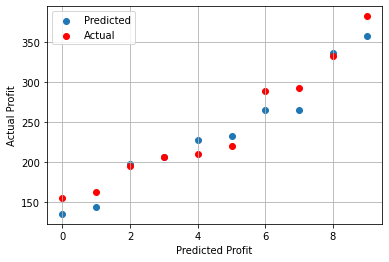

In [77]:

y_pred = regressor.predict(X_test)
x_range = list(range(len(y_test)))
y_pred.sort()
plt.scatter(x_range,y_pred,label = 'Predicted')
y_test.sort()
plt.scatter(x_range,y_test,label = 'Actual',color = 'r')

plt.grid()
plt.legend()
plt.xlabel('Predicted Profit')
plt.ylabel('Actual Profit')
plt.show()

In [78]:
r2_score(y_test, y_pred)

0.9388124572821621

In [79]:
y_pred = regressor.predict(X_train)
r2_score(y_train, y_pred)

0.9502521148808548